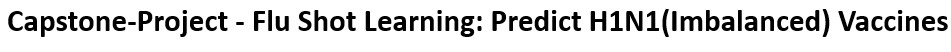

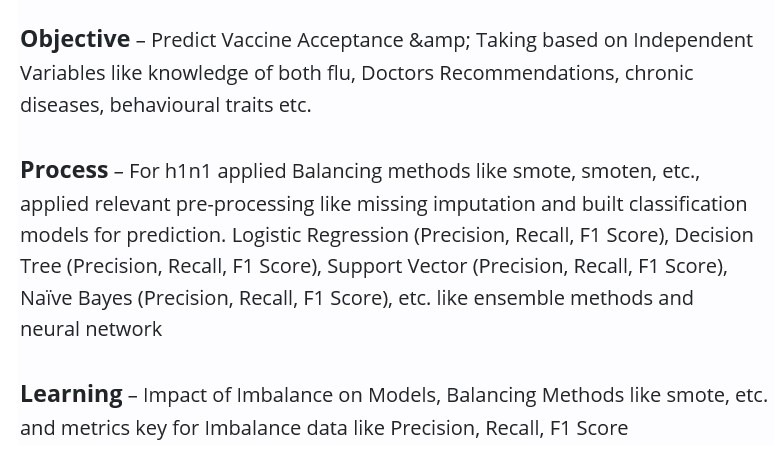

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data Set

In [2]:
import io
%cd "D:\PYTHON DATA SETS"

D:\PYTHON DATA SETS


In [3]:
vactrainlabels=pd.read_csv("vactrainlabels.csv")

In [4]:
vactrain=pd.read_csv('vactrain.csv')

In [5]:
vactest=pd.read_csv("vactest.csv")

In [6]:
vactrainlabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:
vactrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
vactest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [9]:
vactest.isnull().sum().sort_values(ascending=False)/vactest.shape[0]

employment_occupation          0.502696
employment_industry            0.497042
health_insurance               0.457840
income_poverty                 0.168377
doctor_recc_h1n1               0.080875
doctor_recc_seasonal           0.080875
rent_or_own                    0.076232
employment_status              0.055077
marital_status                 0.053991
education                      0.052681
chronic_med_condition          0.034896
child_under_6_months           0.030440
health_worker                  0.029542
opinion_seas_sick_from_vacc    0.019507
opinion_seas_risk              0.018684
opinion_seas_vacc_effective    0.016924
opinion_h1n1_vacc_effective    0.014902
opinion_h1n1_risk              0.014228
opinion_h1n1_sick_from_vacc    0.014041
household_children             0.008424
household_adults               0.008424
behavioral_avoidance           0.007975
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004568
h1n1_concern                   0.003183


In [10]:
print(vactrain.shape)
print(vactest.shape)
print(vactrainlabels.shape)

(26707, 36)
(26708, 36)
(26707, 3)


In [11]:
# Algorithm based missing values imputation - considers the impact of other variables on the 

# missing value and impute accordingly

# MICE - Multivariate imputation using chained equations simultaneously impute both numeric & non numeric missing values

# Initially imputed with mean, Median or mode and chained equation are built

# Chained equations where in the missing value column/variable is treated as dependent variable and relevant classification

# or regression model build and prediction done.

# Missing value will be replaced with predicted value.

# Concatenation of both dataframes for preprocessing

In [12]:
combinedf=pd.concat([vactrain,vactest],axis=0)

In [13]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

# Exploratory Data Analysis using vaccinetrain_df


<Axes: ylabel='sex'>

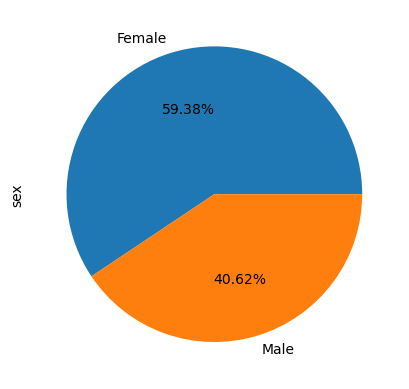

In [14]:
vactrain.sex.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='education'>

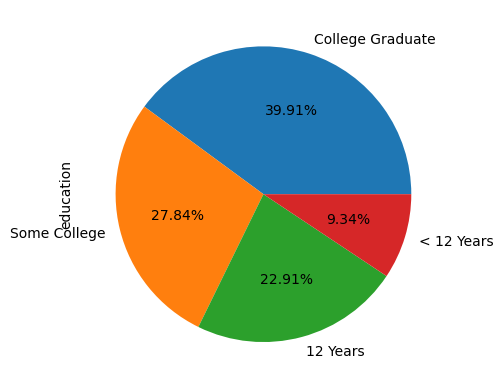

In [15]:
vactrain.education.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='marital_status'>

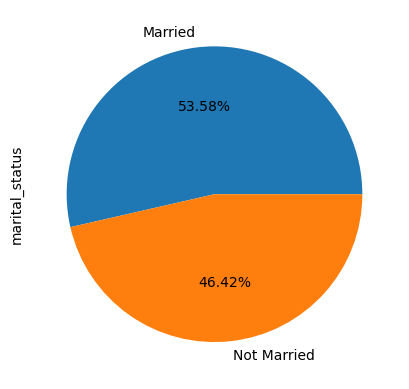

In [16]:
vactrain.marital_status.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='health_insurance'>

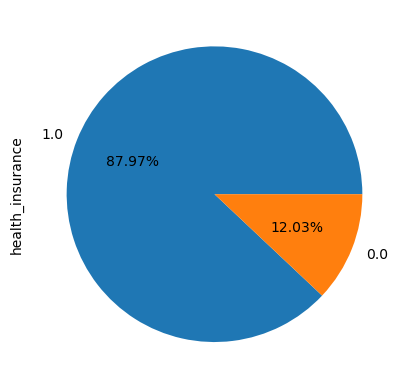

In [17]:
vactrain.health_insurance.value_counts().plot(kind='pie',autopct='%.2f%%')

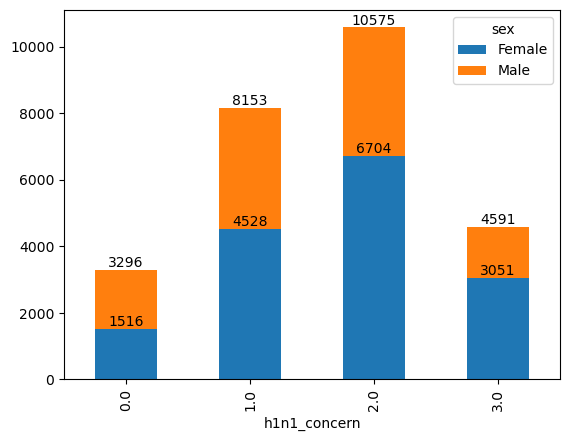

In [18]:
ax=pd.crosstab(vactrain.h1n1_concern,vactrain.sex).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

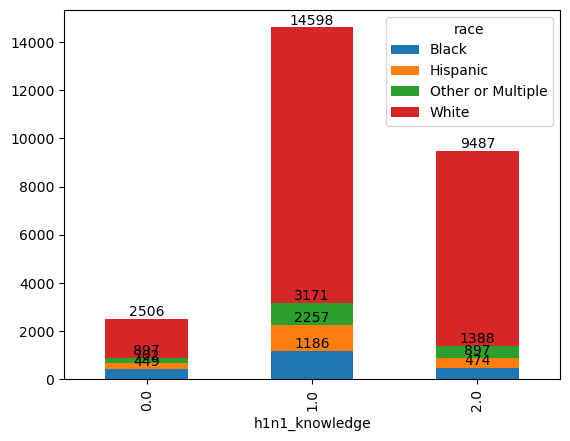

In [19]:
ax=pd.crosstab(vactrain.h1n1_knowledge,vactrain.race).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

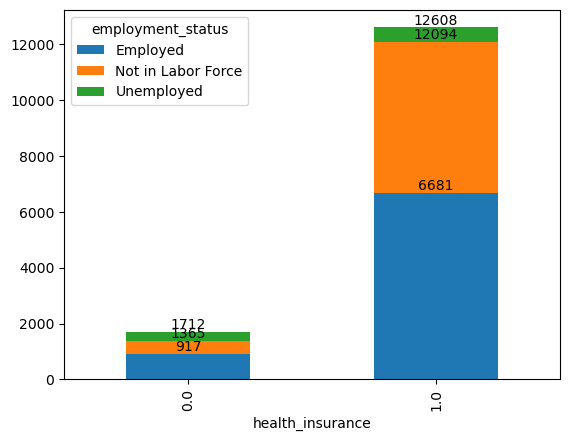

In [20]:
ax=pd.crosstab(vactrain.health_insurance,vactrain.employment_status).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

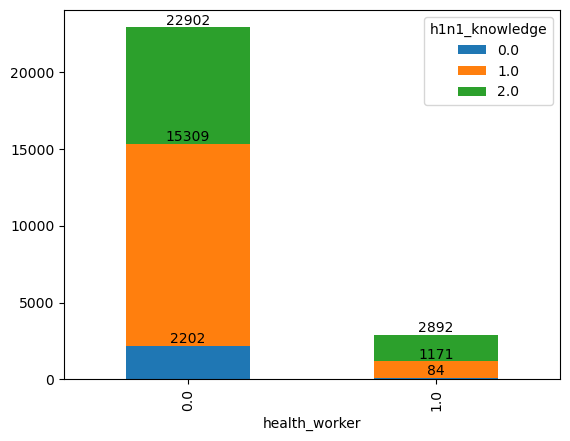

In [21]:
ax=pd.crosstab(vactrain.health_worker,vactrain.h1n1_knowledge).plot(kind='bar',stacked='True')
for i in ax.containers:
    ax.bar_label(i)

# Hypothesis Testing

In [22]:
# Test Null No Association between seasonal_vaccine & h1n1concern
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern)

h1n1_concern,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,2254,4811,5135,2022
1,1042,3342,5440,2569


In [23]:
from scipy.stats import chi2_contingency

In [24]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_concern))
# since pvalue is 4.102289002153701e-143 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=661.7625859400396, pvalue=4.102289002153701e-143, dof=3, expected_freq=array([[1761.25162502, 4356.63971445, 5650.86041706, 2453.24824347],
       [1534.74837498, 3796.36028555, 4924.13958294, 2137.75175653]]))

In [25]:
# Test Null No Association between seasonal_vaccine & h1n1knowledge

In [26]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge)

h1n1_knowledge,0.0,1.0,2.0
seasonal_vaccine,,,
0,1588,8290,4334
1,918,6308,5153


In [27]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.h1n1_knowledge))
# since pvalue is 2.2158145679676294e-86 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=394.45339582163825, pvalue=2.2158145679676294e-86, dof=2, expected_freq=array([[1339.37317137, 7802.14267985, 5070.48414877],
       [1166.62682863, 6795.85732015, 4416.51585123]]))

In [28]:
# Test Null No Association between seasonal_vaccine & health_worker

In [29]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker)

health_worker,0.0,1.0
seasonal_vaccine,,
0,12753,1023
1,10251,1876


In [30]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.health_worker))
# since pvalue is 3.969585517032047e-93 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=419.02923573796994, pvalue=3.969585517032047e-93, dof=1, expected_freq=array([[12234.2239895,  1541.7760105],
       [10769.7760105,  1357.2239895]]))

In [31]:
# Test Null No Association between seasonal_vaccine & sex

In [32]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex)

sex,Female,Male
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [33]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.sex))
# since pvalue is 2.5248076319253385e-36 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

In [34]:
# Test Null No Association between seasonal_vaccine & employment_status

In [35]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status)

employment_status,Employed,Not in Labor Force,Unemployed
seasonal_vaccine,,,
0,7839,4523,1014
1,5721,5708,439


In [36]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.employment_status))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=607.7040373802583, pvalue=1.0933141469852619e-132, dof=2, expected_freq=array([[7185.01663762, 5421.08445571,  769.89890667],
       [6374.98336238, 4809.91554429,  683.10109333]]))

In [37]:
# Test Null No Association between seasonal_vaccine & education

In [38]:
pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education)

education,12 Years,< 12 Years,College Graduate,Some College
seasonal_vaccine,,,,
0,3199,1415,4933,3860
1,2598,948,5164,3183


In [39]:
chi2_contingency(pd.crosstab(vactrainlabels.seasonal_vaccine,vactrain.education))
# since pvalue is 1.0933141469852619e-132 is lessthan 0.05 is reject null

Chi2ContingencyResult(statistic=134.84444384720678, pvalue=4.885885372081626e-29, dof=3, expected_freq=array([[3071.95173913, 1252.20320158, 5350.61181818, 3732.23324111],
       [2725.04826087, 1110.79679842, 4746.38818182, 3310.76675889]]))

In [40]:
combinedf=combinedf.drop('respondent_id',axis=1)

In [41]:
# For using iterative Imputer in sklearn which is experimental as of now 
# 1) Remove variables or columns not needed
# 2) Labelencode all object and categorical data but retain the missing value as it is.

In [42]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
original=combinedf

In [45]:
mask=combinedf.isnull()

In [46]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [47]:
combinedf=combinedf.where(~mask,original)

In [48]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,NaN,NaN
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,13,20
2,1,1,0,1,0,0,0,0,0,NaN,...,0,1,0,0,9,0,2,0,15,22
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,NaN,NaN
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,19,5


In [49]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.tree import DecisionTreeClassifier

In [50]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),
                        initial_strategy="most_frequent",max_iter=20)

In [51]:
combinedf_impute=imputer.fit_transform(combinedf)

E:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [52]:
combinedf_impute=pd.DataFrame(combinedf_impute,columns=combinedf.columns)

In [53]:
combinedf_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<Axes: >

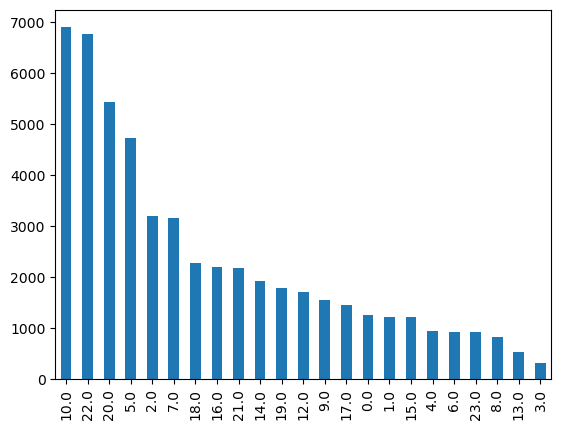

In [54]:
combinedf_impute.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<Axes: >

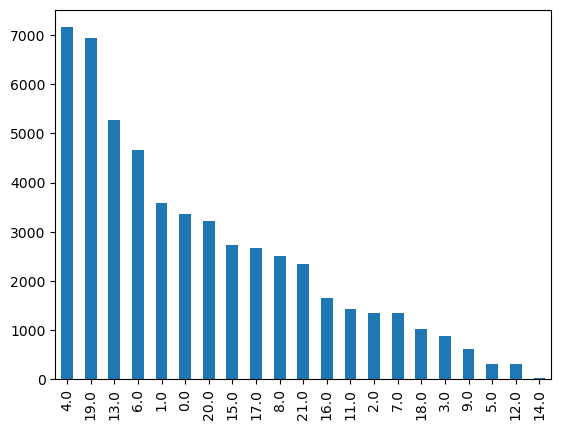

In [55]:
combinedf_impute.employment_industry.value_counts(dropna=False).plot(kind='bar')

# Splitting back the data to Train data and Test data

In [56]:
# Split data back to train & test
vac_train=combinedf_impute.loc[0:26706]

In [57]:
vac_test=combinedf_impute.loc[26707:53414]

In [58]:
print(vac_train.shape)
print(vactrain.shape)
print(vac_test.shape)
print(vactest.shape)

(26707, 35)
(26707, 36)
(26708, 35)
(26708, 36)


<Axes: >

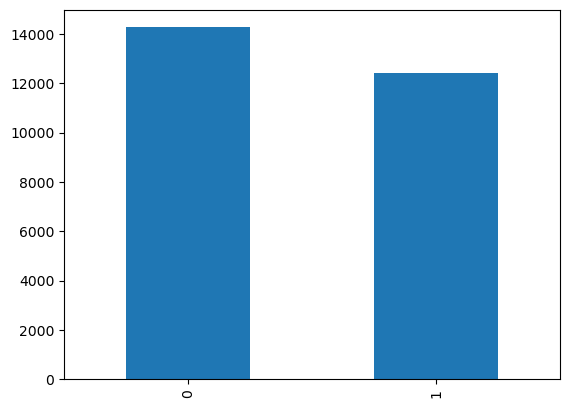

In [59]:
vactrainlabels.seasonal_vaccine.value_counts().plot(kind='bar')

<Axes: >

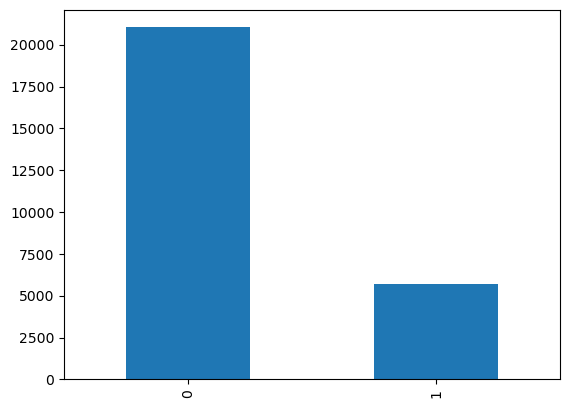

In [60]:
vactrainlabels.h1n1_vaccine.value_counts().plot(kind='bar')

In [61]:
y=vactrainlabels.h1n1_vaccine
x=vac_train

In [62]:
y=LabelEncoder().fit_transform(y)

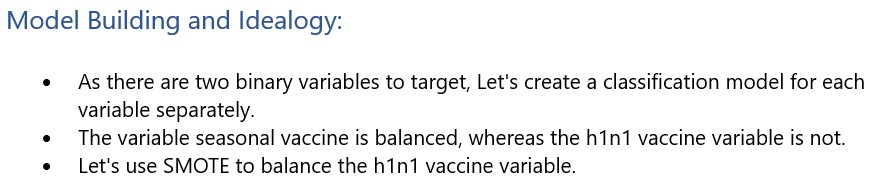

In [63]:
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression for H1N1 Vaccine

In [64]:
logit=LogisticRegression(max_iter=1000).fit(x,y)

In [65]:
logit.score(x,y)

0.8310929718800315

In [66]:
cross_val_score(logit,x,y)

array([0.8259079 , 0.82534631, 0.83336454, 0.83654746, 0.82793484])

In [67]:
np.mean([0.82834145, 0.82628229, 0.83430069, 0.83467515, 0.82756038])

0.8302319919999999

In [68]:
logitpredict=logit.predict(x)

In [69]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.68      0.70     26707
weighted avg       0.82      0.83      0.81     26707



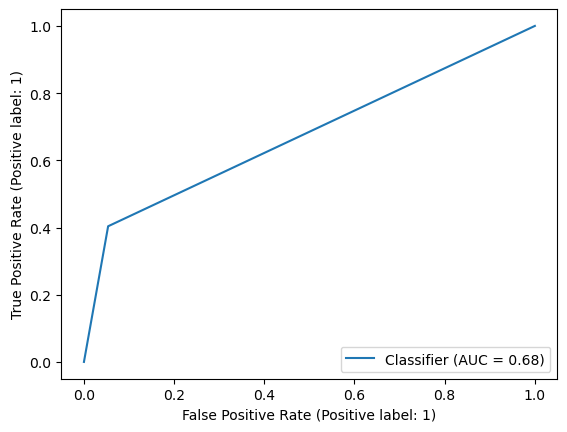

In [70]:
RocCurveDisplay.from_predictions(y,logitpredict)

# Decision Tree Classification for H1N1 Vaccine

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
tree=DecisionTreeClassifier(max_depth=10)

In [73]:
treemodel=tree.fit(x,y)

In [74]:
treemodel.score(x,y)

0.8656906429026098

In [75]:
treepredict=tree.predict(x)

In [76]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21033
           1       0.76      0.54      0.63      5674

    accuracy                           0.87     26707
   macro avg       0.82      0.75      0.77     26707
weighted avg       0.86      0.87      0.86     26707



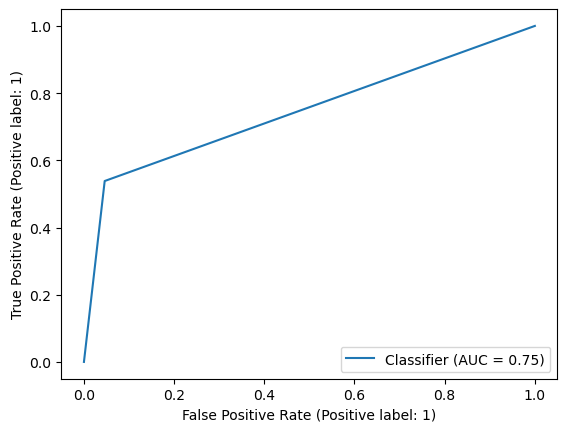

In [77]:
RocCurveDisplay.from_predictions(y,treepredict)

# Random Forest Classification for H1N1 Vaccine

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RF=RandomForestClassifier(n_estimators=3000)

In [80]:
RFmodel=RF.fit(x,y)

In [81]:
RFmodel.score(x,y)

1.0

In [82]:
cross_val_score(RFmodel,x,y) 

array([0.83189817, 0.82871584, 0.83280285, 0.83841977, 0.83055608])

In [83]:
np.mean([0.83171097, 0.83133658, 0.83186669, 0.83767085, 0.82943269])

0.8324035559999998

In [84]:
RFpredict=RF.predict(x)

In [85]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00      5674

    accuracy                           1.00     26707
   macro avg       1.00      1.00      1.00     26707
weighted avg       1.00      1.00      1.00     26707



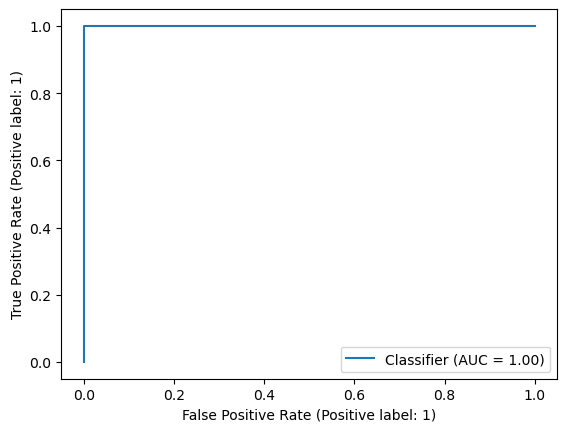

In [86]:
RocCurveDisplay.from_predictions(y,RFpredict)

# Gradient Boosting Classification for H1N1 Vaccine

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
GB=GradientBoostingClassifier(n_estimators=3000)

In [89]:
GBModel=GB.fit(x,y)

In [90]:
GBModel.score(x,y)

0.8862096079679485

In [91]:
cross_val_score(GBModel,x,y) 

array([0.8302134 , 0.8260951 , 0.82830931, 0.83448792, 0.81950946])

In [92]:
np.mean([0.82965182, 0.82628229, 0.82681146, 0.83430069, 0.81801161])

0.8270115739999999

In [93]:
GBpredict=GB.predict(x)

In [94]:
print(classification_report(y,GBpredict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     21033
           1       0.82      0.60      0.69      5674

    accuracy                           0.89     26707
   macro avg       0.86      0.78      0.81     26707
weighted avg       0.88      0.89      0.88     26707



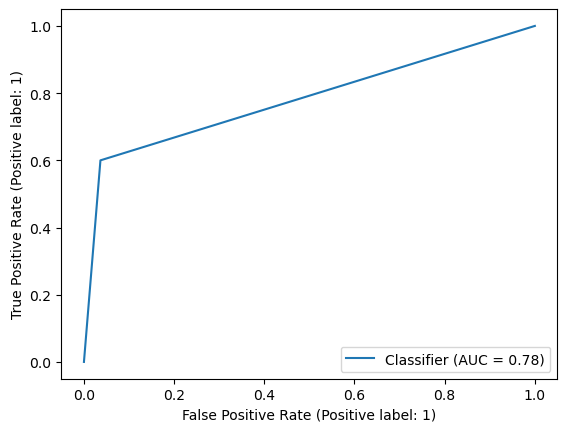

In [95]:
RocCurveDisplay.from_predictions(y,GBpredict)

# Support Vector Classification for H1N1 Vaccine

In [96]:
from sklearn.svm import SVC

In [97]:
svm = SVC()

In [98]:
svmmodel = svm.fit(x,y)

In [99]:
svmmodel.score(x,y)

0.8229677612610926

In [100]:
cross_val_score(svmmodel,x,y)

array([0.81654811, 0.81860726, 0.82119453, 0.81445422, 0.82194346])

In [101]:
np.mean([0.81430176, 0.81448896, 0.81688822, 0.81707545, 0.81819884])

0.8161906460000001

In [102]:
svmpredict = svmmodel.predict(x)

In [103]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     21033
           1       0.74      0.26      0.38      5674

    accuracy                           0.82     26707
   macro avg       0.78      0.62      0.64     26707
weighted avg       0.81      0.82      0.79     26707



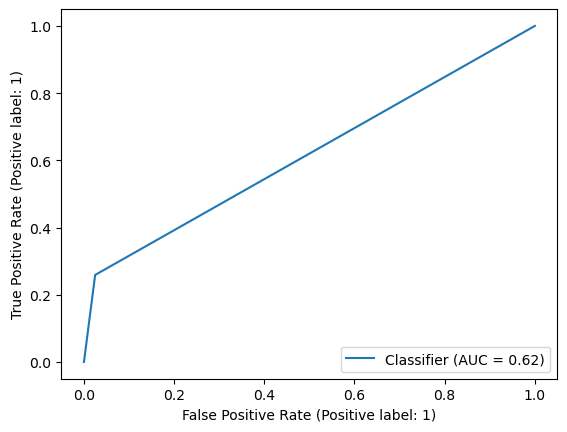

In [104]:
RocCurveDisplay.from_predictions(y,svmpredict)

# Naive Bayes Classification for H1N1 Vaccine

In [105]:
from sklearn.naive_bayes import BernoulliNB

In [106]:
nb=BernoulliNB()

In [107]:
nbmodel=nb.fit(x,y)

In [108]:
nbmodel.score(x,y)

0.7963455273898229

In [109]:
nbpredict=nbmodel.predict(x)

In [110]:
pd.crosstab(y,nbpredict)

col_0,0,1
row_0,,
0,18595,2438
1,3001,2673


In [111]:
cross_val_score(nb,x,y)

array([0.78977911, 0.79333583, 0.80116083, 0.80509268, 0.78880359])

In [112]:
np.mean([0.69468364, 0.71827031, 0.70436248, 0.71615802, 0.70043063])


0.706781016

In [113]:
print(classification_report(y,nbpredict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     21033
           1       0.52      0.47      0.50      5674

    accuracy                           0.80     26707
   macro avg       0.69      0.68      0.68     26707
weighted avg       0.79      0.80      0.79     26707



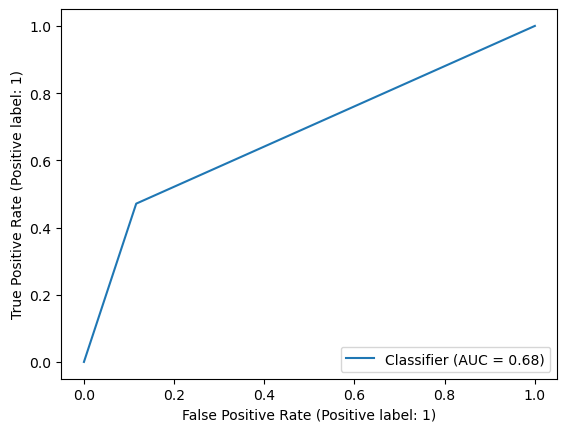

In [114]:
RocCurveDisplay.from_predictions(y,nbpredict)

# KNN Classification for H1N1 Vaccine

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [116]:
knn=KNeighborsClassifier()

In [117]:
k_range=list(range(1,25))
param_grid=dict(n_neighbors=k_range)
grid=GridSearchCV(knn,param_grid,cv=3)

In [118]:
grid_search=grid.fit(x,y)

In [119]:
grid_search.score(x,y)

0.821095592915715

In [120]:
grid_search.best_params_

{'n_neighbors': 17}

In [121]:
grid_search.best_score_

0.8057063783856023

In [122]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [123]:
knn_predict=grid_search.predict(x)

In [124]:
pd.crosstab(y,knn_predict)

col_0,0,1
row_0,,
0,20406,627
1,4151,1523


In [125]:
print(classification_report(y,knn_predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     21033
           1       0.71      0.27      0.39      5674

    accuracy                           0.82     26707
   macro avg       0.77      0.62      0.64     26707
weighted avg       0.80      0.82      0.79     26707



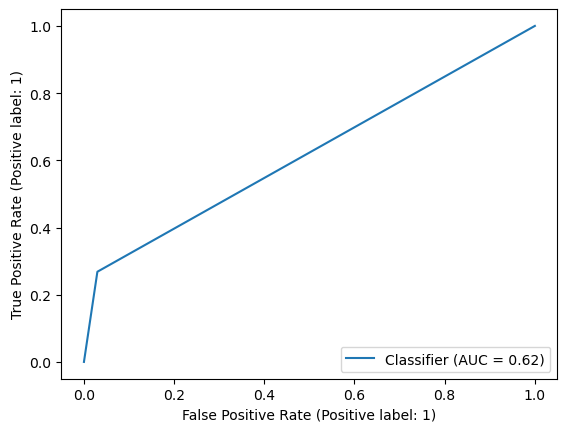

In [126]:
RocCurveDisplay.from_predictions(y,knn_predict)

# Balancing the Imbalance Data using Smote

In [127]:
# SMOTE - Synthetic minority OverSampling Technique
# SMOTE - Uses KNN Algorithm(Ecludien Distance) and creates artificial or Synthetic data that lies within Range.

# No Outliers are created
# SMOTE also uses Random number generator for generating random weights between 0 and 1

# Two Independent Variables - x1 - Income and x2 - Age 
# X1 - 2400,2500,2700,2300,2100
# X2 - 46, 34, 45, 28, 25, 41
# Choose a randomly selected weight between 0 and 1. Randomly selected 0.60
# 2500 +0.60*(2400-2500)= 2440 (synthetic Data Point)
# 34 +0.60*(46-34) = 41.20 or 41 (Synthetic Data Point)

# SMOTE - Works only on Numeric Data
# SMOTENC - For Both Numeric and Non Numeric Categorical Data
# SMOTEN - only for Non Numeric Categorical Data

In [128]:
from imblearn.over_sampling import SMOTEN

In [129]:
smote=SMOTEN(random_state=42)

In [130]:
x_smote,y_smote=smote.fit_resample(x,y)

In [131]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

0    21033
1     5674
dtype: int64
0    21033
1    21033
dtype: int64


# Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,Support Vector,Naiv Bayes,KNN Classifiers:

In [132]:
logit_smote=LogisticRegression(max_iter=1000)

In [133]:
logit_smote_model=logit_smote.fit(x_smote,y_smote)

In [134]:
logit_smote_model.score(x_smote,y_smote)

0.8131983074216708

In [135]:
cross_val_score(logit_smote_model,x_smote,y_smote)

array([0.6787497 , 0.79365268, 0.84119815, 0.85070724, 0.84939974])

In [136]:
np.mean([0.67672926, 0.79020563, 0.83323428, 0.84476406, 0.84119815])

0.7972262760000001

In [137]:
logit_smote_pred=logit_smote_model.predict(x_smote)

In [138]:
print(classification_report(y_smote,logit_smote_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



In [139]:
pd.crosstab(y_smote,logit_smote_pred)

col_0,0,1
row_0,,
0,17299,3734
1,4124,16909


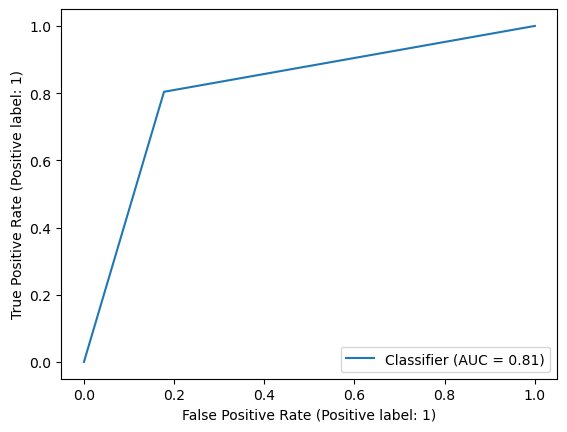

In [140]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_pred)

In [141]:
tree_smote=DecisionTreeClassifier(max_depth=10)

In [142]:
tree_smote_model=tree_smote.fit(x_smote,y_smote)

In [143]:
tree_smote_model.score(x_smote,y_smote)

0.8443873912423335

In [144]:
cross_val_score(tree_smote_model,x_smote,y_smote)

array([0.66258617, 0.78521336, 0.83442292, 0.84488292, 0.84595269])

In [145]:
np.mean([0.66199192, 0.78497563, 0.83739451, 0.83786996, 0.84096042])

0.792638488

In [146]:
tree_smote_pred=tree_smote_model.predict(x_smote)

In [147]:
pd.DataFrame(tree_smote_pred).to_csv("smote_h1n1tree.csv")

In [148]:
print(classification_report(y_smote,tree_smote_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     21033
           1       0.83      0.86      0.85     21033

    accuracy                           0.84     42066
   macro avg       0.84      0.84      0.84     42066
weighted avg       0.84      0.84      0.84     42066



In [149]:
pd.crosstab(y_smote,tree_smote_pred)

col_0,0,1
row_0,,
0,17465,3568
1,2978,18055


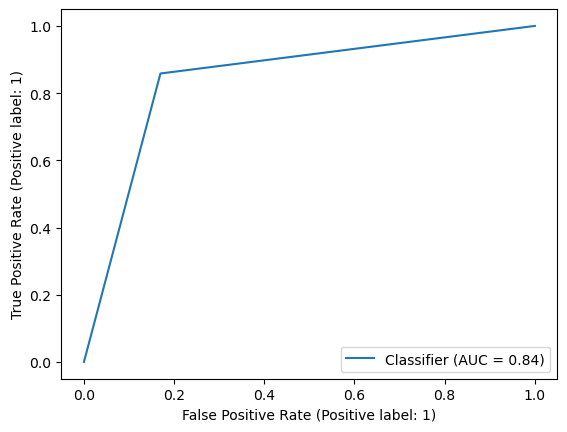

In [150]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_pred)

In [151]:
RF_smote=RandomForestClassifier(n_estimators=3000)

In [152]:
RF_smote_model=RF_smote.fit(x_smote,y_smote)

In [153]:
RF_smote_model.score(x_smote,y_smote)

1.0

In [154]:
cross_val_score(RF_smote_model,x_smote,y_smote)

array([0.65818873, 0.86722929, 0.93807203, 0.9421134 , 0.94021158])

In [155]:
np.mean([0.65771333, 0.86615952, 0.94092476, 0.94496612, 0.94021158])

0.8699950620000001

In [156]:
RF_smote_pred=RF_smote_model.predict(x_smote)

In [157]:
pd.DataFrame(RF_smote_pred).to_csv("smote_H1N1RF.csv")

In [158]:
print(classification_report(y_smote,RF_smote_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21033
           1       1.00      1.00      1.00     21033

    accuracy                           1.00     42066
   macro avg       1.00      1.00      1.00     42066
weighted avg       1.00      1.00      1.00     42066



In [159]:
pd.crosstab(y_smote,RF_smote_pred)

col_0,0,1
row_0,,
0,21033,0
1,0,21033


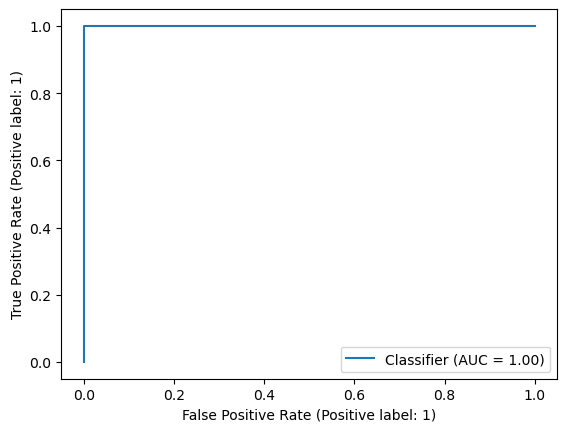

In [160]:
RocCurveDisplay.from_predictions(y_smote,RF_smote_pred)

In [161]:
GB_smote=GradientBoostingClassifier(n_estimators=3000)

In [162]:
GB_smote_model=GB_smote.fit(x_smote,y_smote)

In [163]:
GB_smote_model.score(x_smote,y_smote)

0.9000855798031665

In [164]:
cross_val_score(GB_smote_model,x_smote,y_smote)

array([0.66306156, 0.83870201, 0.90585998, 0.91275407, 0.90681089])

In [165]:
np.mean([0.66115997, 0.84155474, 0.90895043, 0.90978248, 0.90871271])

0.846032066

In [166]:
GB_smote_pred=GB_smote_model.predict(x_smote)

In [167]:
pd.DataFrame(GB_smote_pred).to_csv("smote_H1N1GBM.csv")

In [168]:
print(classification_report(y_smote,GB_smote_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21033
           1       0.90      0.90      0.90     21033

    accuracy                           0.90     42066
   macro avg       0.90      0.90      0.90     42066
weighted avg       0.90      0.90      0.90     42066



In [169]:
pd.crosstab(y_smote,GB_smote_pred)

col_0,0,1
row_0,,
0,18982,2051
1,2152,18881


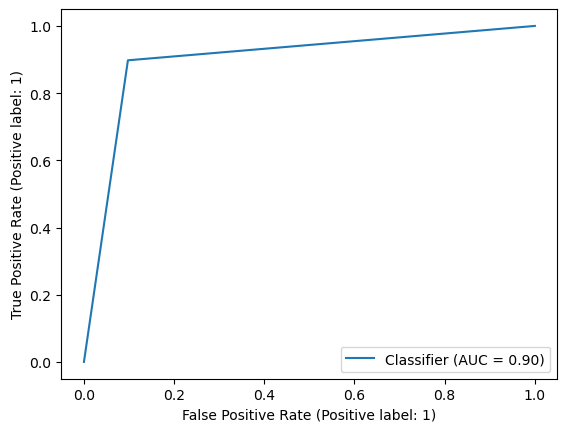

In [170]:
RocCurveDisplay.from_predictions(y_smote,GB_smote_pred)

In [171]:
svm_smote_model = svm.fit(x_smote,y_smote)

In [172]:
svm_smote_model.score(x_smote,y_smote)

0.8272001141064043

In [173]:
cross_val_score(svm_smote_model,x_smote,y_smote)

array([0.6787497 , 0.80197314, 0.84975633, 0.8586711 , 0.85653156])

In [174]:
np.mean([0.67494652, 0.80137882, 0.84000951, 0.85177701, 0.85201474])

0.8040253199999998

In [175]:
svm_smote_pred = svm_smote_model.predict(x_smote)

In [176]:
print(classification_report(y_smote,svm_smote_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     21033
           1       0.84      0.81      0.82     21033

    accuracy                           0.83     42066
   macro avg       0.83      0.83      0.83     42066
weighted avg       0.83      0.83      0.83     42066



In [177]:
pd.crosstab(y_smote,svm_smote_pred)

col_0,0,1
row_0,,
0,17678,3355
1,3914,17119


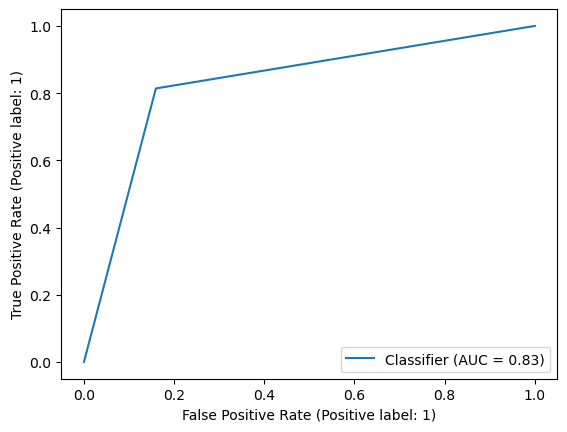

In [178]:
RocCurveDisplay.from_predictions(y_smote,svm_smote_pred)

In [179]:
nb_smote_model = nb.fit(x_smote,y_smote)

In [180]:
nb_smote_model.score(x_smote,y_smote)

0.7649408073028099

In [181]:
cross_val_score(nb_smote_model,x_smote,y_smote)

array([0.64547183, 0.7455129 , 0.80125995, 0.80066564, 0.79531677])

In [182]:
np.mean([0.64594723, 0.74384881, 0.79389041, 0.79329609, 0.79079995])

0.753556498

In [183]:
nb_smote_pred=nb_smote_model.predict(x_smote)

In [184]:
print(classification_report(y_smote,nb_smote_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     21033
           1       0.76      0.78      0.77     21033

    accuracy                           0.76     42066
   macro avg       0.77      0.76      0.76     42066
weighted avg       0.77      0.76      0.76     42066



In [185]:
pd.crosstab(y_smote,nb_smote_pred)

col_0,0,1
row_0,,
0,15686,5347
1,4541,16492


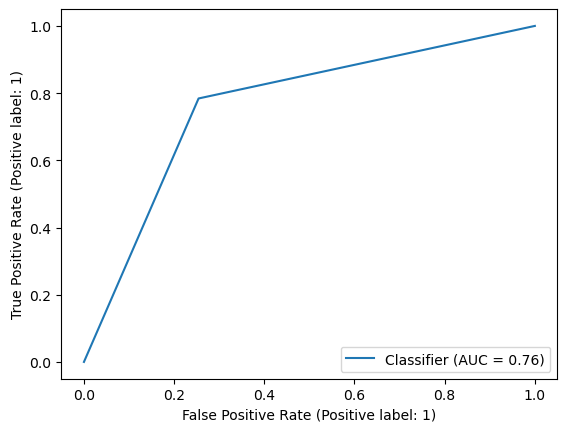

In [186]:
RocCurveDisplay.from_predictions(y_smote,nb_smote_pred)

In [187]:
knn_smote_model = knn.fit(x_smote,y_smote)

In [188]:
knn_smote_model.score(x_smote,y_smote)

0.8622878334046499

In [189]:
cross_val_score(knn_smote_model,x_smote,y_smote)

array([0.66353696, 0.78331154, 0.84286224, 0.83489837, 0.83608701])

In [190]:
np.mean([0.66781555, 0.77130631, 0.8259836 , 0.83323428, 0.82788542])

0.785245032

In [191]:
knn_smote_pred=knn_smote_model.predict(x_smote)

In [192]:
print(classification_report(y_smote,knn_smote_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86     21033
           1       0.83      0.90      0.87     21033

    accuracy                           0.86     42066
   macro avg       0.86      0.86      0.86     42066
weighted avg       0.86      0.86      0.86     42066



In [193]:
pd.crosstab(y_smote,knn_smote_pred)

col_0,0,1
row_0,,
0,17266,3767
1,2026,19007


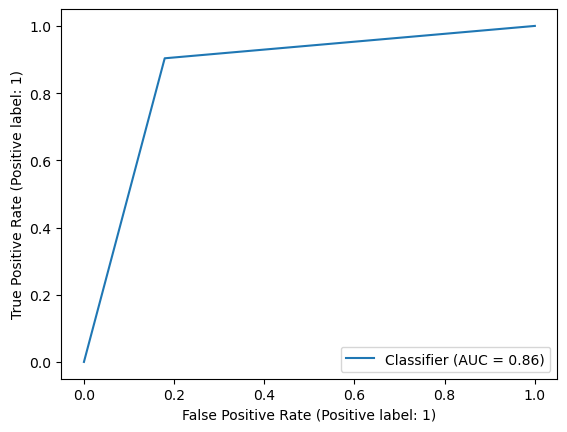

In [194]:
RocCurveDisplay.from_predictions(y_smote,knn_smote_pred)

# Predicting Seasonal Vaccines for Submissions

In [195]:
y_seasonal=vactrainlabels.seasonal_vaccine

In [196]:
y_seasonal=LabelEncoder().fit_transform(y_seasonal)

# Decision tree for Sesonal Vaccine

In [197]:
tree_seasonal=DecisionTreeClassifier(max_depth=10)

In [198]:
tree_seasonal_model=tree_seasonal.fit(x,y_seasonal)

In [199]:
tree_seasonal.score(x,y_seasonal)

0.8138690231025574

In [200]:
tree_seasonal_pred=tree_seasonal_model.predict_proba(vac_test)

In [201]:
tree_smote_h1n1=tree_smote_model.predict_proba(vac_test)

In [202]:
pd.DataFrame(tree_seasonal_pred).to_csv("stree_season.csv")

# Random Forest for Seasonal Vaccine

In [203]:
rf_seasonal=RandomForestClassifier(n_estimators=3000)

In [204]:
rf_seasonal_model=rf_seasonal.fit(x,y_seasonal)

In [205]:
rf_seasonal_model.score(x,y_seasonal)

1.0

In [206]:
np.mean([0.77517784, 0.77761138, 0.77925482, 0.78225051, 0.77888036])

0.778634982

In [207]:
rf_seasonal_pred=rf_seasonal_model.predict_proba(vac_test)

In [208]:
pd.DataFrame(rf_seasonal_pred).to_csv("srf_season.csv")

# Gradient Boosting for Seasonal Vaccine

In [209]:
gbm_seasonal=GradientBoostingClassifier(n_estimators=3000)

In [210]:
gbm_seasonal_model=gbm_seasonal.fit(x,y_seasonal)

In [211]:
gbm_seasonal_model.score(x,y_seasonal)

0.8406784738083648

In [212]:
np.mean([0.77105953, 0.78079371, 0.77719528, 0.78955252, 0.78262498])

0.7802452040000001

In [213]:
gbm_seasonal_pred=gbm_seasonal_model.predict_proba(vac_test)

In [214]:
pd.DataFrame(gbm_seasonal_pred).to_csv("sgbm_season.csv")

In [215]:
# Imbalance Data is a problem in Classification Both in binary and multinomial

# majority class will be more than 70% and minority class is less than 30%
# model performance will be severely effected.

# In Imbalance Data classification Accuracy of the model will be good but
# sensitivity/Recall, Precision and F1 Score of minority class is worst.
# Even AUC will be bad for Imbalance Data model
# classification report must be checked in case of Imbalance Data

# Dealing with Imbalance Data - Sampling methods must be used. oversampling and undersampling

# 1) Random over sampling is where observations from minority class are duplicated.

# 2)  Random under sampling is where observations from majority class are deleted.

# Undersampling is used when there is Large scale Data

# Oversampling is used when data size is small scale data

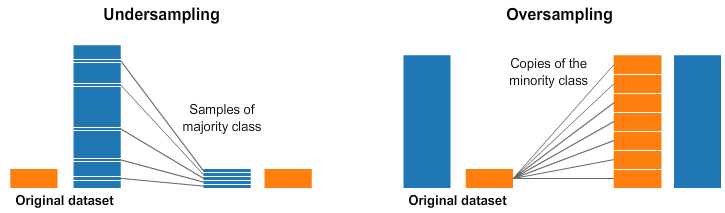

In [216]:
from imblearn.under_sampling import RandomUnderSampler

In [217]:
rus=RandomUnderSampler(random_state=42)

In [218]:
x_rus,y_rus=rus.fit_resample(x,y)

In [219]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_rus).value_counts())


0    21033
1     5674
dtype: int64
0    5674
1    5674
dtype: int64


In [220]:
logit_rus=LogisticRegression(max_iter=1000)

In [221]:
logit_rus_model=logit_rus.fit(x_rus,y_rus)

In [222]:
logit_rus_model.score(x_rus,y_rus)

0.7574021854071202

In [223]:
logit_rus_pred=logit_rus_model.predict(x_rus)

In [224]:
print(classification_report(y_rus,logit_rus_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5674
           1       0.77      0.73      0.75      5674

    accuracy                           0.76     11348
   macro avg       0.76      0.76      0.76     11348
weighted avg       0.76      0.76      0.76     11348



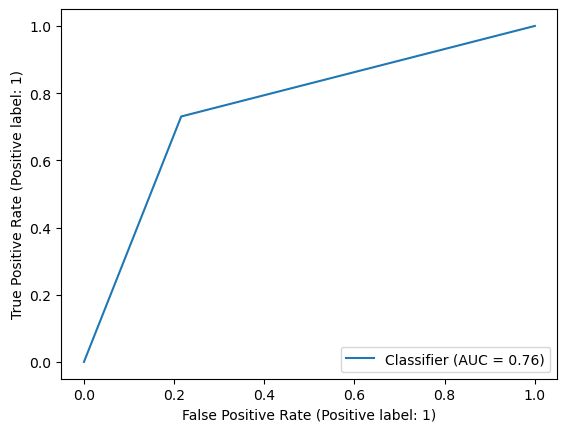

In [225]:
RocCurveDisplay.from_predictions(y_rus,logit_rus_pred)

In [226]:
from imblearn.over_sampling import RandomOverSampler

In [227]:
ros=RandomOverSampler(random_state=42)

In [228]:
x_ros,y_ros=ros.fit_resample(x,y)

In [229]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_ros).value_counts())

0    21033
1     5674
dtype: int64
0    21033
1    21033
dtype: int64


In [230]:
logit_ros=LogisticRegression(max_iter=1000)

In [231]:
logit_ros_model=logit_ros.fit(x_ros,y_ros)

In [232]:
logit_ros_model.score(x_ros,y_ros)

0.7551466742737603

In [233]:
logit_ros_pred=logit_ros_model.predict(x_ros)

In [234]:
print(classification_report(y_ros,logit_ros_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     21033
           1       0.77      0.73      0.75     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.75     42066
weighted avg       0.76      0.76      0.75     42066



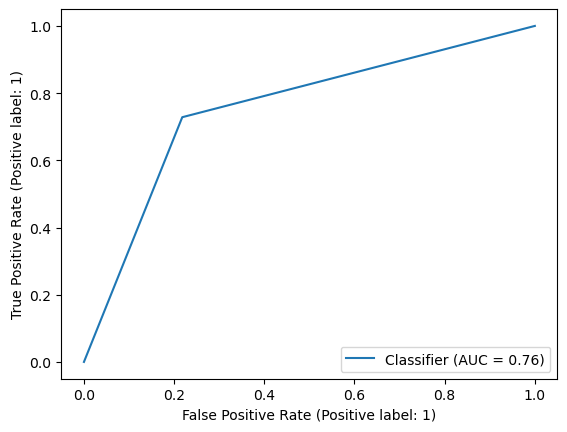

In [235]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_pred)

# Undersampling Technique - Tomek links are pairs of observations of 
# Opposite classes in class vicinity.
# In this algorithm, majority class observations are deleted from the tomek Link,
# Which provides a better decision for a classifier.

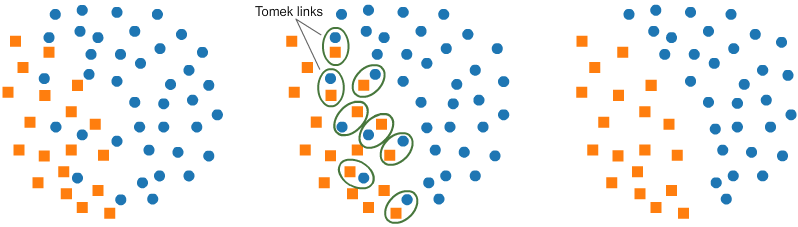

In [236]:
from imblearn.under_sampling import TomekLinks

In [237]:
tomeklinks=TomekLinks(sampling_strategy='majority')

In [238]:
x_tomeklinks,y_tomeklinks=tomeklinks.fit_resample(x,y)

In [239]:
pd.DataFrame(y_tomeklinks).value_counts()

0    19741
1     5674
dtype: int64

In [240]:
logit_tomek=LogisticRegression(max_iter=1000)

In [241]:
logit_tomek_model=logit_tomek.fit(x_tomeklinks,y_tomeklinks)

In [242]:
logit_tomek_model.score(x_tomeklinks,y_tomeklinks)

0.8322644107810349

In [243]:
logit_tomek_pred=logit_tomek_model.predict(x_tomeklinks)

In [244]:
print(classification_report(y_tomeklinks,logit_tomek_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     19741
           1       0.69      0.44      0.54      5674

    accuracy                           0.83     25415
   macro avg       0.77      0.69      0.72     25415
weighted avg       0.82      0.83      0.82     25415



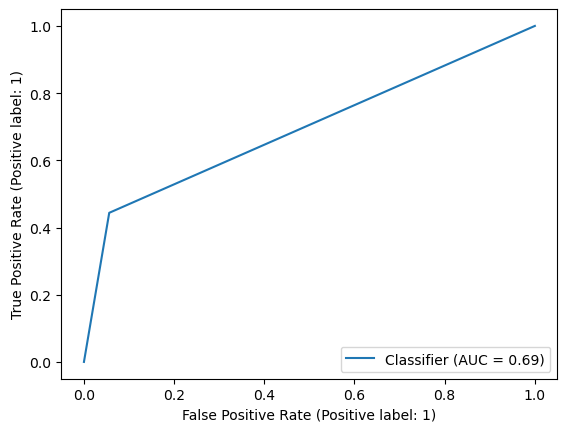

In [245]:
RocCurveDisplay.from_predictions(y_tomeklinks,logit_tomek_pred)

# Submissions

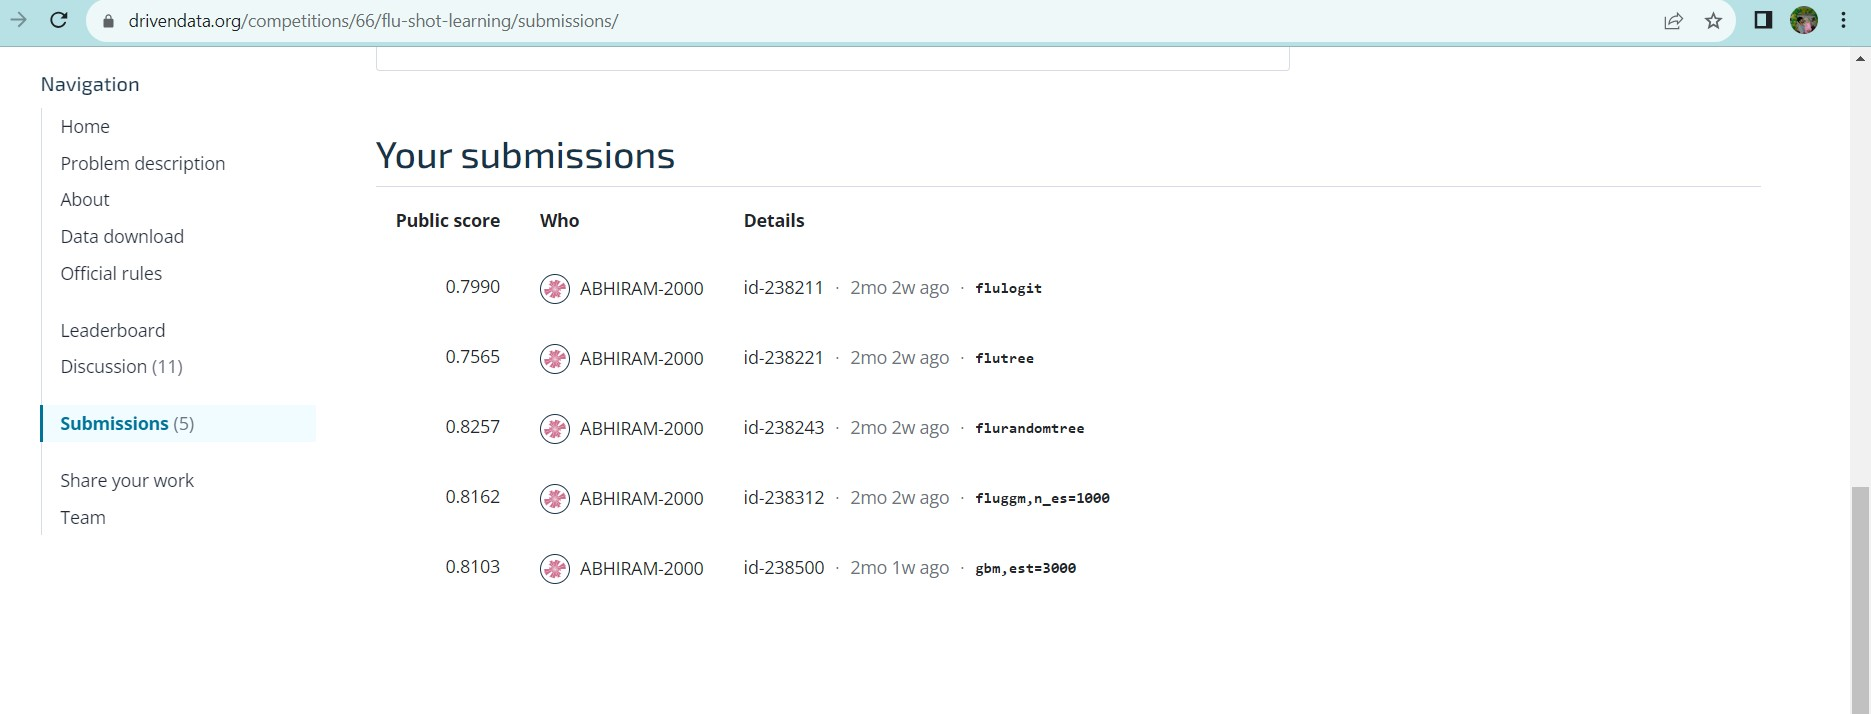

# Performance Metric Report:

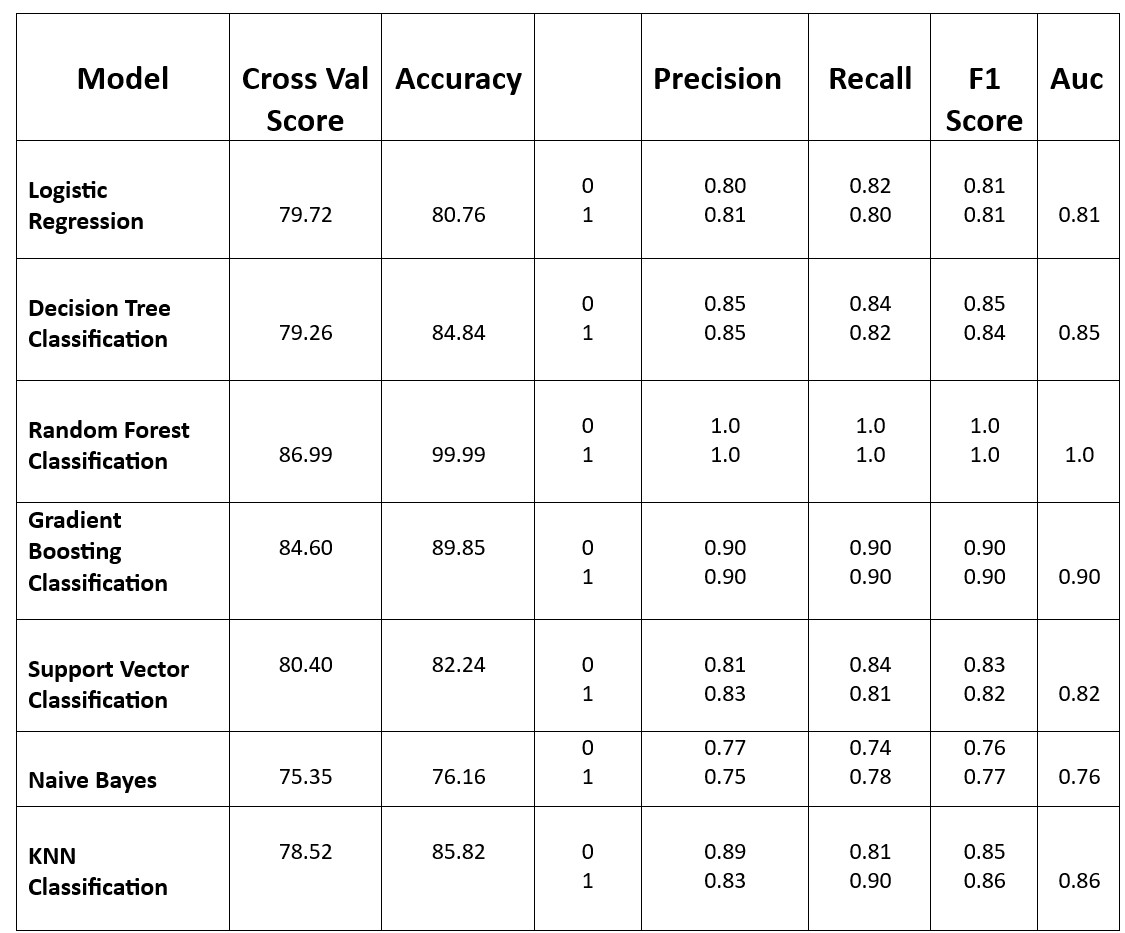

# Conclusion

I Entered the predicted test values into Competition Flu Shot Learning, Predicted H1N1 Flu Vaccines on the driven.org Website.

Of all the models, The most accurate Classification method is Gradient Boosting with Accuracy 0.90